In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, concatenate, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## Load mnist data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
xa = train_images.reshape((60000, 28 , 28)).astype('float32') / 255  # normalizatioin
ya = train_labels

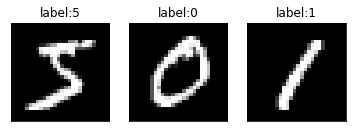

In [6]:
img_id = [0,1,3]
plt.figure(figsize=(6, 2))
for i in range(len(img_id)):
    # display original
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(train_images[img_id[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("label:" + str(ya[img_id[i]]) )
plt.show()

## Pre-process data

In [7]:
#the first 40000 data of xa, ya are re shffule, with the last original 20000 data are saved to xb, yb
#by this way, there will be at least 20000 data set with the same category
idx = np.arange(40000)                      
np.random.shuffle(idx)                      
xb = np.concatenate((xa[idx], xa[40000:]))  
yb = np.concatenate((ya[idx], ya[40000:]))  
# build label：1 is the same category, 0 is not
y = np.where(ya==yb, 1.0, 0.0)   
# re shuffle xa/ya, xb/yb
idx = np.arange(60000)               
np.random.shuffle(idx)               
xa, xb, y = xa[idx], xb[idx], y[idx] 

print(f'Total data: {len(y)}, {int(y.sum())} data are in the same category')

Total data: 60000, 24169 data are in the same category


## Make multi-input model

In [10]:
a = Input(shape=(28,28,1))
b = Input(shape=(28,28,1))

shr_c = Conv2D(64, (3,3), activation='relu')    # shared layer for image analysis
c_a = shr_c(a)
c_b = shr_c(b)

shr_m = MaxPooling2D(2, 2)
m_a = shr_m(c_a)
m_b = shr_m(c_b)

shr_c2 = Conv2D(64, (3,3), activation='relu')    # shared layer for image analysis
c_a2 = shr_c2(m_a)
c_b2 = shr_c2(m_b)

shr_m2 = MaxPooling2D(2, 2)
m_a2 = shr_m2(c_a2)
m_b2 = shr_m2(c_b2)

shr_f = Flatten()
f_a = shr_f(m_a2)
f_b = shr_f(m_b2)

out = concatenate([f_a, f_b])     # combine input a and b

out = Dense(128, activation='relu')(out)    # Dense layer for classification
out = Dense(1, activation='sigmoid')(out)  # binary classification

model = Model([a, b], out)               # build the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 26, 26, 64)   640         input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 64)   0           conv2d_2[0][0]               

## Train the model

In [11]:
#10% for validation
history = model.fit([xa, xb], y, validation_split=0.1, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
422/422 - 4s - loss: 0.3044 - acc: 0.8635 - val_loss: 0.1078 - val_acc: 0.9580
Epoch 2/20
422/422 - 4s - loss: 0.0849 - acc: 0.9699 - val_loss: 0.0739 - val_acc: 0.9775
Epoch 3/20
422/422 - 4s - loss: 0.0509 - acc: 0.9821 - val_loss: 0.0534 - val_acc: 0.9807
Epoch 4/20
422/422 - 4s - loss: 0.0341 - acc: 0.9883 - val_loss: 0.0424 - val_acc: 0.9853
Epoch 5/20
422/422 - 4s - loss: 0.0242 - acc: 0.9914 - val_loss: 0.0441 - val_acc: 0.9865
Epoch 6/20
422/422 - 4s - loss: 0.0159 - acc: 0.9946 - val_loss: 0.0883 - val_acc: 0.9815
Epoch 7/20
422/422 - 4s - loss: 0.0115 - acc: 0.9961 - val_loss: 0.0506 - val_acc: 0.9865
Epoch 8/20
422/422 - 4s - loss: 0.0074 - acc: 0.9974 - val_loss: 0.0676 - val_acc: 0.9862
Epoch 9/20
422/422 - 4s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.0550 - val_acc: 0.9850
Epoch 10/20
422/422 - 4s - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0729 - val_acc: 0.9842
Epoch 11/20
422/422 - 4s - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0686 - val_acc: 0.9840
Epoch 12

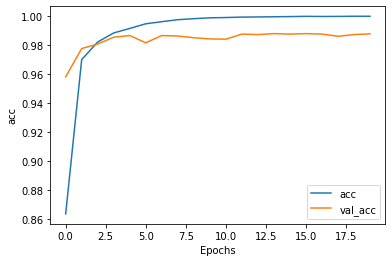

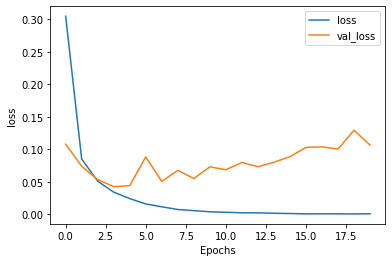

In [12]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

## Test the model

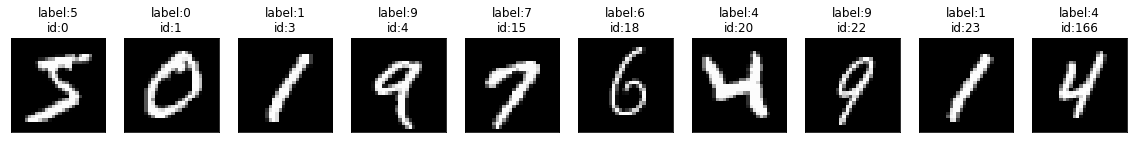

In [13]:
img_id = [0,1,3,4,15,18,20,22,23,166]
plt.figure(figsize=(20, 2))
for i in range(len(img_id)):
    # display original
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[img_id[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("label:" + str(ya[img_id[i]]) + "\n" + "id:" + str(img_id[i]))
plt.show()

In [14]:
x1 = train_images[20].reshape((1, 28, 28)).astype('float32') / 255
x2 = train_images[166].reshape((1, 28, 28)).astype('float32') / 255
print(x1.shape)
# x1 = np.expand_dims(xa[3], axis=0)
# x2 = np.expand_dims(xa[23], axis=0)

(1, 28, 28)


In [15]:
model.predict([x1,x2])

array([[1.]], dtype=float32)